In [1]:
import geopandas as gpd 
import matplotlib as ma
import pandas as pd
import threading as thread
import fiona
import matplotlib as plt
import plotly.express as plt
import numpy as np

Index(['geometry'], dtype='object')


<Axes: >

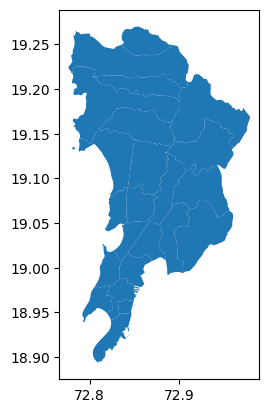

In [2]:
fiona.drvsupport.supported_drivers['ESRI Shapefile'] = 'r'
fiona.drvsupport.supported_drivers['OpenFileGDB'] = 'r'
fiona.drvsupport.supported_drivers['DXF'] = 'r'
pth='/home/vedanshi/Documents/DSML/IMD work/Mumbai analysis/mumbai.shp'

# Set SHAPE_RESTORE_SHX config option to YES
fiona.os.environ['SHAPE_RESTORE_SHX'] = 'YES'

# Now try reading the shapefile again
shape_file = gpd.read_file(pth, engine='fiona')
print(shape_file.columns)
shape_file.plot()


In [3]:
shape_file

,geometry
0,"POLYGON ((72.84025 18.94881, 72.84030 18.94880..."
1,"POLYGON ((72.84456 18.96342, 72.84461 18.96342..."
2,"POLYGON ((72.83198 18.96174, 72.83197 18.96164..."
3,"POLYGON ((72.81873 18.96901, 72.81878 18.96900..."
4,"POLYGON ((72.84677 18.98183, 72.84658 18.98143..."
5,"POLYGON ((72.85625 19.01059, 72.85630 19.01053..."
6,"POLYGON ((72.82689 19.01942, 72.82691 19.01940..."
7,"POLYGON ((72.87091 19.05119, 72.87103 19.05113..."
8,"POLYGON ((72.86699 19.05237, 72.86738 19.05237..."
9,"POLYGON ((72.91670 19.10911, 72.91659 19.10893..."


In [4]:
print(shape_file.crs)

None


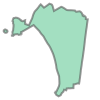

In [5]:
geo=np.array(shape_file.geometry)
geo[13]

Extracting area of the parts 

ar=[]

for i in range(24):

    ar.append(geo[i].area)
    
ar

In [6]:
# setting crs.
desired_crs = {'init': 'epsg:32644'} 
shape_file.crs = desired_crs
shape_file.crs

/home/vedanshi/.local/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<Projected CRS: EPSG:32644>
Name: WGS 84 / UTM zone 44N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 78°E and 84°E, northern hemisphere between equator and 84°N, onshore and offshore. China. India. Kazakhstan. Kyrgyzstan. Nepal. Russian Federation. Sri Lanka.
- bounds: (78.0, 0.0, 84.0, 84.0)
Coordinate Operation:
- name: UTM zone 44N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
bound_box=shape_file.total_bounds
minx,miny,maxx,maxy=bound_box

In [8]:
from shapely.geometry import box
# Create a rectangle from these coordinates using shapely's box function
rectangle = gpd.GeoSeries([box(minx, miny, maxx, maxy)], crs=shape_file.crs)
# Print the rectangle coordinates
print(f"Bounding Box Coordinates: {bound_box}")
print(f"Rectangle Geometry: {rectangle}")

Bounding Box Coordinates: [72.77633295 18.89395643 72.9797315  19.27017667]
Rectangle Geometry: 0    POLYGON ((72.980 18.894, 72.980 19.270, 72.776...
dtype: geometry


<Axes: >

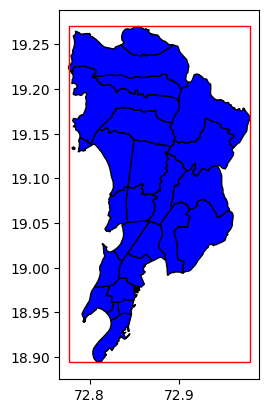

In [9]:
ax = shape_file.plot(color='blue', edgecolor='k')
rectangle.plot(ax=ax, color='none', edgecolor='red')

In [23]:
#Increase the rectangle size by 30 km in both height and width
minx_new = minx - 0.005
miny_new = miny - 0.005
maxx_new = maxx + 0.005
maxy_new = maxy + 0.005

In [26]:
new_bounding_box = [minx_new, miny_new, maxx_new, maxy_new]
rectangle_new = gpd.GeoSeries([box(minx_new, miny_new, maxx_new, maxy_new)], crs=shape_file.crs)
# Print the new bounding box coordinates as integers
print(f"New Bounding Box Coordinates: {list(map(float, new_bounding_box))}")

# Calculate and print the dimensions of the new rectangle as integers
width_new = maxx_new - minx_new
height_new = maxy_new - miny_new
print(f"New Rectangle Dimensions: Width = {float(width_new)}, Height = {float(height_new)}")


New Bounding Box Coordinates: [72.77133295153348, 18.88895643371942, 72.98473149704591, 19.275176667777735]
New Rectangle Dimensions: Width = 0.2133985455124332, Height = 0.38622023405831385


<Axes: >

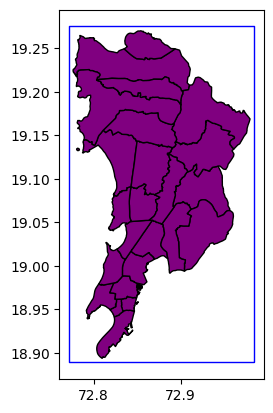

In [25]:
ax = shape_file.plot(color='purple', edgecolor='k')
rectangle_new.plot(ax=ax, color='none', edgecolor='blue')

In [155]:
# initialize minx_new and maxx_new, i.e the boundary poits for the grid.
minx_new = 72.8
maxx_new = 73
# initialize an empty list to store x-values for the custom grid
x_values = []
# generate x-values
current_x = minx_new
increment = 0.1
while current_x <= maxx_new:
    x_values.append(current_x)  
    current_x += increment
len(x_values)

3

In [180]:
# initialize minx_new and maxx_new, i.e the boundary poits for the grid.
miny_new = 18.9
maxy_new = 19.34
# initialize an empty list to store y-values for the custom grid
y_values = []
# generate y-values
current_y = miny_new
increment = 0.1
while current_y <= maxy_new:
    y_values.append(current_y)  
    current_y += increment
len(y_values)

5

In [181]:
x_values = np.array(x_values, dtype=float)
y_values = np.array(y_values, dtype=float)

In [182]:
# function to calculate grid parameters
def calculate_grid_parameters(coord):
    d = np.diff(coord)[0] / 2
    cell_boundaries = np.concatenate([[coord[0] - d], coord + d])
    return cell_boundaries

In [183]:
# function to create grid cell taking arguments from x_values and y_values
def initialize_and_populate_grid(x_values, y_values):
    ngrid_cell = len(x_values) * len(y_values)
    grid_cell = [{} for _ in range(ngrid_cell)]
    
    dy = y_values[1] - y_values[0]
    k = 0
    
    loncell = calculate_grid_parameters(x_values)
    latcell = calculate_grid_parameters(y_values)
    
    for i, lon in enumerate(x_values):
        for j, lat in enumerate(y_values):
            x_coords = [round(loncell[i], 2), round(loncell[i], 2), round(loncell[i+1], 2), round(loncell[i+1], 2), round(loncell[i], 2)]
            y_coords = [round(latcell[j], 2), round(latcell[j+1], 2), round(latcell[j+1], 2), round(latcell[j], 2), round(latcell[j], 2)] if dy > 0 else \
                       [round(latcell[j+1], 2), round(latcell[j], 2), round(latcell[j], 2), round(latcell[j+1], 2), round(latcell[j+1], 2)]
            
            grid_cell[k] = {'X': x_coords, 'Y': y_coords, 'Xc': round(lon, 2), 'Yc': round(lat, 2)}
            k += 1
    return grid_cell

In [184]:
if __name__ == "__main__":
    grid_cell = initialize_and_populate_grid(x_values, y_values)

In [185]:
grid_cell

[{'X': [72.75, 72.75, 72.85, 72.85, 72.75],
  'Y': [18.85, 18.95, 18.95, 18.85, 18.85],
  'Xc': 72.8,
  'Yc': 18.9},
 {'X': [72.75, 72.75, 72.85, 72.85, 72.75],
  'Y': [18.95, 19.05, 19.05, 18.95, 18.95],
  'Xc': 72.8,
  'Yc': 19.0},
 {'X': [72.75, 72.75, 72.85, 72.85, 72.75],
  'Y': [19.05, 19.15, 19.15, 19.05, 19.05],
  'Xc': 72.8,
  'Yc': 19.1},
 {'X': [72.75, 72.75, 72.85, 72.85, 72.75],
  'Y': [19.15, 19.25, 19.25, 19.15, 19.15],
  'Xc': 72.8,
  'Yc': 19.2},
 {'X': [72.75, 72.75, 72.85, 72.85, 72.75],
  'Y': [19.25, 19.35, 19.35, 19.25, 19.25],
  'Xc': 72.8,
  'Yc': 19.3},
 {'X': [72.85, 72.85, 72.95, 72.95, 72.85],
  'Y': [18.85, 18.95, 18.95, 18.85, 18.85],
  'Xc': 72.9,
  'Yc': 18.9},
 {'X': [72.85, 72.85, 72.95, 72.95, 72.85],
  'Y': [18.95, 19.05, 19.05, 18.95, 18.95],
  'Xc': 72.9,
  'Yc': 19.0},
 {'X': [72.85, 72.85, 72.95, 72.95, 72.85],
  'Y': [19.05, 19.15, 19.15, 19.05, 19.05],
  'Xc': 72.9,
  'Yc': 19.1},
 {'X': [72.85, 72.85, 72.95, 72.95, 72.85],
  'Y': [19.15, 19.25

In [186]:
# creating a geodataframe for grid cells as polygons
from shapely.geometry import Polygon
import geopandas as gpd

grid_cells = []

for cell in grid_cell:
    polygon = Polygon(list(zip(cell['X'], cell['Y'])))
    grid_cells.append(polygon)

grid_gdf = gpd.GeoDataFrame({'geometry': grid_cells}, crs=shape_file.crs)

print(grid_gdf.head())

                                            geometry
0  POLYGON ((72.750 18.850, 72.750 18.950, 72.850...
1  POLYGON ((72.750 18.950, 72.750 19.050, 72.850...
2  POLYGON ((72.750 19.050, 72.750 19.150, 72.850...
3  POLYGON ((72.750 19.150, 72.750 19.250, 72.850...
4  POLYGON ((72.750 19.250, 72.750 19.350, 72.850...


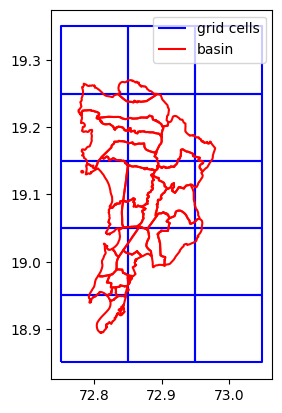

In [188]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
grid_gdf.boundary.plot(ax=ax, color='blue', label='grid cells')
shape_file.boundary.plot(ax=ax, color='red',label='basin')
plt.legend()
plt.show()